In [1]:
# In order for Python to find the Spark, download the findspark library and start it with findspark.init() function.
import findspark
findspark.init()

In [2]:
# In order to work with RDDs, we need to create a SparkContext.
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [3]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

22/03/24 00:39:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
sc=spark.sparkContext

In [6]:
text = sc.textFile("/Users/futamatatakumi/Documents/Python/Research Seminar/Al Jazeera.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/Asahi.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/BBC.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/CNN.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/France24.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/GlobalTimes.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/Guardian.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/NewYorkTimes.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/Tokyo.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/WashingtonPost.txt")

In [7]:
text.collect()

['Tokyo wraps up 2020 Olympics in subdued closing ceremony',
 'The closing ceremony in Tokyo echoes the restraint of the Olympics held without spectators due to the COVID-19 pandemic.',
 '',
 'Tokyo doused its Olympic flame on Sunday in a ceremony that echoed the restraint of the games held without spectators and transformed by the global pandemic, dazzling sport and deeply personal turmoil.',
 '',
 'After postponing the Tokyo 2020 Games for a year, organisers said the event would serve as a symbol of world triumph over the pandemic. But with strict pandemic countermeasures and as COVID-19 variants have surged back around the world, the Olympics fell short of the triumph and financial windfall Japan had wanted.',
 '',
 'The ceremony, although lustreless, gave athletes something of a glimpse of everyday Tokyo life as the Olympic Stadium was transformed into a park with grass, buskers and BMX riders.',
 '',
 'The scene was meant so the visitors could “experience Tokyo”, organisers said, 

In [8]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [9]:
text_cleaned = text.map(lower_clean_str)
text_cleaned.collect()

['tokyo wraps up 2020 olympics in subdued closing ceremony',
 'the closing ceremony in tokyo echoes the restraint of the olympics held without spectators due to the covid19 pandemic',
 '',
 'tokyo doused its olympic flame on sunday in a ceremony that echoed the restraint of the games held without spectators and transformed by the global pandemic dazzling sport and deeply personal turmoil',
 '',
 'after postponing the tokyo 2020 games for a year organisers said the event would serve as a symbol of world triumph over the pandemic but with strict pandemic countermeasures and as covid19 variants have surged back around the world the olympics fell short of the triumph and financial windfall japan had wanted',
 '',
 'the ceremony although lustreless gave athletes something of a glimpse of everyday tokyo life as the olympic stadium was transformed into a park with grass buskers and bmx riders',
 '',
 'the scene was meant so the visitors could “experience tokyo” organisers said a poignant remi

In [10]:
text_count = text_cleaned.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)

In [11]:
text_count.collect()

/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


[('of', 361),
 ('', 287),
 ('year', 9),
 ('organisers', 6),
 ('said', 43),
 ('would', 16),
 ('have', 45),
 ('something', 4),
 ('was', 62),
 ('an', 45),
 ('is', 37),
 ('no', 14),
 ('thanked', 1),
 ('entire', 5),
 ('badly', 2),
 ('minister', 3),
 ('showed', 7),
 ('amid', 7),
 ('putting', 3),
 ('than', 17),
 ('hospitals', 2),
 ('united', 3),
 ('at', 62),
 ('showcased', 1),
 ('68000capacity', 1),
 ('medallists', 1),
 ('peres', 1),
 ('high', 8),
 ('her', 14),
 ('us', 20),
 ('pulled', 1),
 ('citing', 1),
 ('frank', 1),
 ('athletes’', 1),
 ('run', 2),
 ('host', 10),
 ('astronaut', 1),
 ('gravity', 1),
 ('jets', 1),
 ('step', 2),
 ('right', 7),
 ('eventually', 1),
 ('decided', 4),
 ('central', 5),
 ('raised', 5),
 ('critically', 2),
 ('responses', 1),
 ('findings', 1),
 ('mission', 3),
 ('2011', 3),
 ('swelling', 1),
 ('swept', 1),
 ('vicious', 1),
 ('politics', 2),
 ('making', 4),
 ('authority', 1),
 ('answered', 1),
 ('volunteer', 2),
 ('declined', 1),
 ('worked', 2),
 ('before', 13),
 ('nat

In [12]:
df = text_count.toDF()
df1 = df.toPandas()

In [13]:
df1 = df1.rename(columns={'_1':'word', '_2':'count'})
prepositions = ['the', 'and', 'a', 'an', 'of', 'to', 'in', 'that', 'have', 'at', 'it', 'as', 'for', 'was', 'is', \
                'be', 'are', 'from', 'by', 'on', 'or', '', '–', 'were', 'with', 'their', 'some', 'her', 'more', \
                'but', 'this', 'there', 'said', 'has', 'had', 'not', 'its']
df1 = df1[~df1['word'].isin(prepositions)]
df_final = df1.sort_values('count', ascending=False).head(10)
df_final

,word,count
1625,games,118
1907,tokyo,81
2457,olympic,80
1348,olympics,72
1917,athletes,56
274,pandemic,45
1099,world,31
657,chinese,30
2187,japan,30
1357,people,29


In [14]:
df1.count()

word     2704
count    2704
dtype: int64

# Word Cloud

In [15]:
import glob

read_files = glob.glob("/Users/futamatatakumi/Documents/Python/Research Seminar/*.txt")

with open("result.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

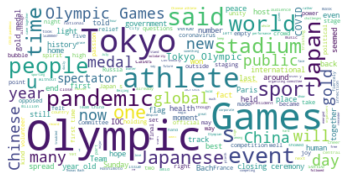

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Load text file
data = open("/Users/futamatatakumi/Documents/Python/Research Seminar/result.txt", encoding="utf8").read()

# Create image
wordcloud = WordCloud(max_font_size=50, max_words=200, random_state=1, background_color="white").generate(data)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# Save image
wordcloud.to_file("/Users/futamatatakumi/Documents/Python/Research Seminar/result.png")